## Anotaciones

* _holiday_ incluye a _shops closed_
* trabajar con la fecha
* Ver los fin de semanas
* Cuantos días pasaron desde el ultimo feriado y cuanto falta para el siguiente (?)
* Ver outliers en los feriados (o en los días)
* Maximos y minimos en los user_activities
* Diferenciar por pais

## Carga de librerías

In [79]:
#Agregamos librerias a utilizar
import keras as keras
import pandas as pd
import xgboost as xgb
# import sklearn as sk
import numpy as np
from datetime import datetime

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#modelos y métricas
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense

import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import StackingRegressor,RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
pd.set_option('display.max_columns', 40)

# import warnings
# warnings.simplefilter("ignore")

## Visualización de datos

In [3]:
# Generamos un dataframe del dataset de entrenamiento
df =  pd.read_csv('train.csv')
df

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.80,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.50,0.0,1704.0,32410.0,Prague_1_2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,0,0,0,0.0,0,1.51,0.0,2983.0,27111.0,Budapest_1_2024-03-10
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,0,0,0,0.0,0,1.03,0.0,2975.0,27133.0,Budapest_1_2024-03-11
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,0,0,0,0.0,0,0.21,0.0,2974.0,27151.0,Budapest_1_2024-03-12
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,0,0,0,0.0,0,0.00,0.0,2979.0,27180.0,Budapest_1_2024-03-13


In [4]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

### Primeros vistazos al dataset original

In [5]:
print(f"El maximo de numero de ordenes en un dia es: {df.orders.max()}")

El maximo de numero de ordenes en un dia es: 18139.0


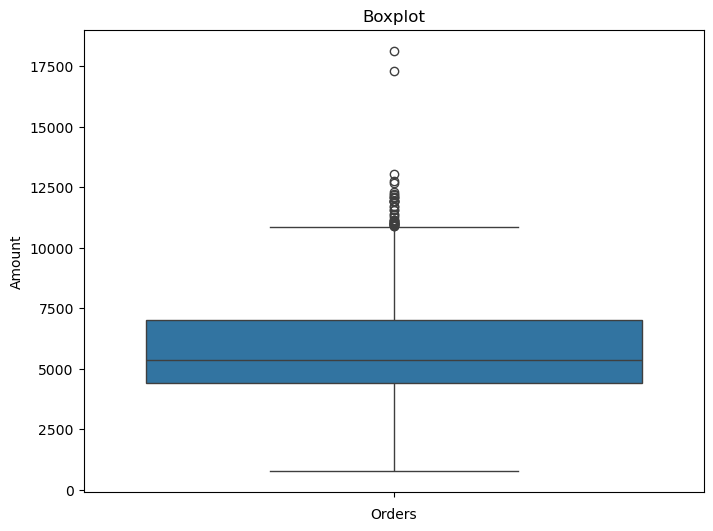

In [6]:
# Boxplot de la cantidad de apariciones de cada numero de ordenes por dia

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

In [7]:
df.count()

warehouse                 7340
date                      7340
orders                    7340
holiday_name               218
holiday                   7340
shutdown                  7340
mini_shutdown             7340
shops_closed              7340
winter_school_holidays    7340
school_holidays           7340
blackout                  7340
mov_change                7340
frankfurt_shutdown        7340
precipitation             7070
snow                      7070
user_activity_1           7340
user_activity_2           7340
id                        7340
dtype: int64

In [8]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [9]:
df.shops_closed.value_counts()

shops_closed
0    7260
1      80
Name: count, dtype: int64

In [10]:
df[df.warehouse == 'Frankfurt_1'].count()

warehouse                 629
date                      629
orders                    629
holiday_name                6
holiday                   629
shutdown                  629
mini_shutdown             629
shops_closed              629
winter_school_holidays    629
school_holidays           629
blackout                  629
mov_change                629
frankfurt_shutdown        629
precipitation             626
snow                      626
user_activity_1           629
user_activity_2           629
id                        629
dtype: int64

In [11]:
df.frankfurt_shutdown.value_counts()

frankfurt_shutdown
0    7338
1       2
Name: count, dtype: int64

Podemos ver que de las 7340 muestras que tenemos disponibles, solo dos tienen positivo en la columna frankfurt_shutdown, lo que significa que muy posiblemente no tenga relevancia en la variable target y que sera de poca utilidad para el entrenamiento de los modelos predictores.

### Visualizaciones de variaciones del dataset

Para poder obtener mayor información -más precisa y más útil- respecto de los datos disponibles debemos hacer modificaciones al dataset que nos permitan estudiarlo mejor.

#### Dataset limpio (para testear)

La primera modificación tiene que ver con las variables que no se encuentran en el dataset de test. Estas hay que quitarlas para así entrenar modelos con únicamente con las mismas variables que luego se encuentren en el dataset de test. Entonces usaremos este nuevo datagram para visualizar datos y para entrenar a los modelos.

In [12]:
df_clean = df.drop(columns=["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "user_activity_1", "user_activity_2", "blackout", "mov_change", "id"])
df_clean.head(5)

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0


Mostramos la correlacion entre las variables numericas y el numero de ordenes por día y sucursal. Para eso debemos quitar todas las variables no númericas

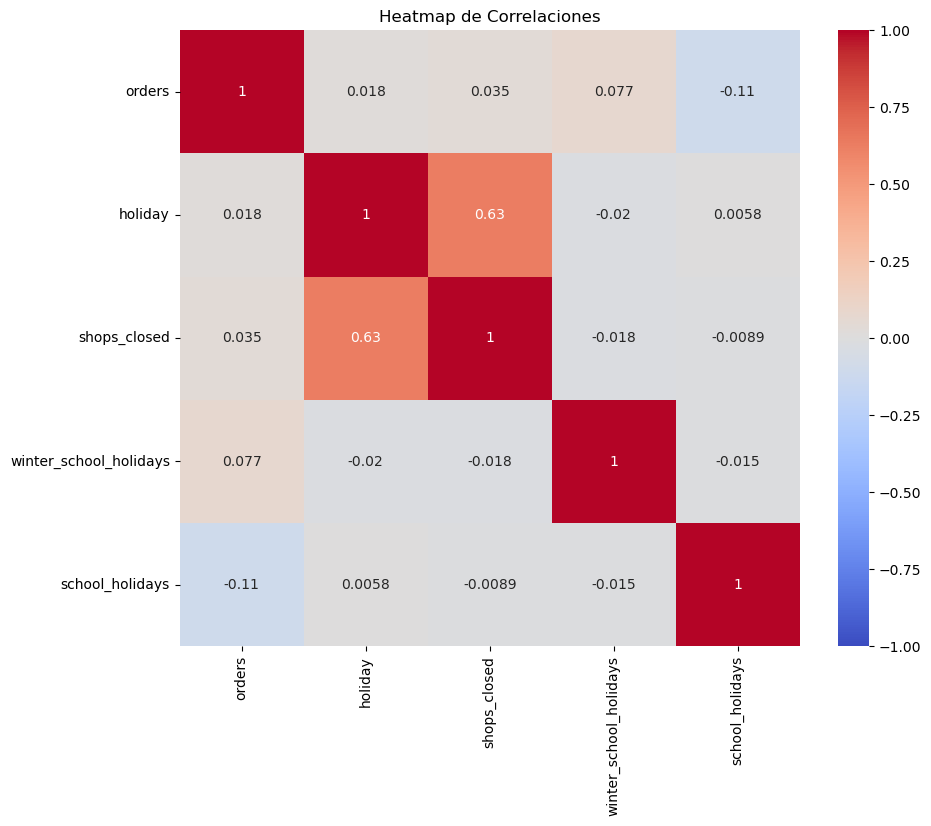

In [13]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

#### Dataset de (no) feriados

Otra distinción que tenemos es la de separar los días en si fueron feriado/vacaciones o no.

In [14]:
# Dividimos el dataset en los que son feriados/vacaciones y en los que no
df_holiday = df[df.holiday == 1]
df_no_holiday = df[df.holiday == 0]

Mostramos el Boxplot de cada uno

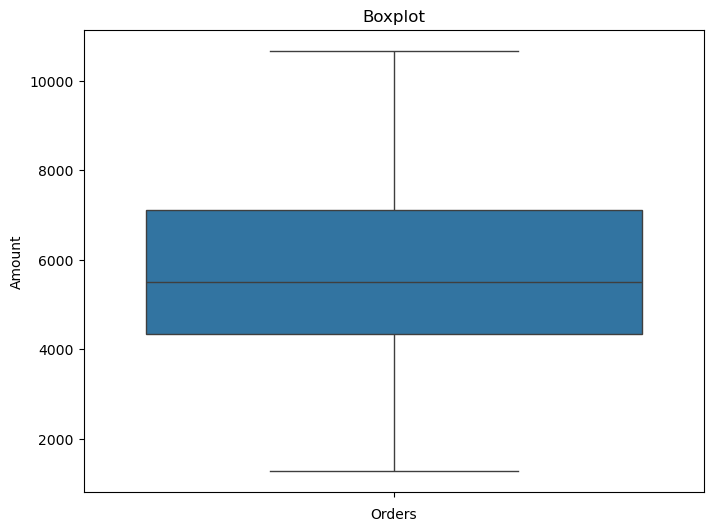

In [15]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

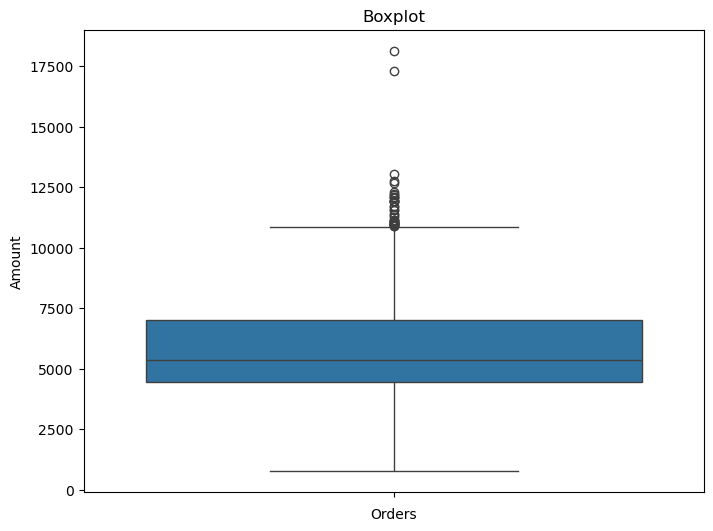

In [16]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_no_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

#### Dataset de sucursales

Claramente la sucursal es un factor determinante en las muestras. Queremos ver que tanta correlacion tiene cada sucursal respecto al valor de la variable target. Para eso hacemos variables dummies con la columna warehouse y hacemos un heatmap de correlaciones.

In [17]:
df_warehouses = df_clean.drop(columns=["holiday", "holiday_name", 'date', "shops_closed", "school_holidays", "winter_school_holidays"])

# Primero agregamos las variables de las actividades de usuario para ver su correlacion

# user activity 1
df_usact1 = df[["user_activity_1"]]
df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean().reset_index()
df_warehouses["user_activity_1"] = pd.merge(df_warehouses, df_usact1, on="warehouse", how="inner")["user_activity_1"]

# user activity 2
df_usact2 = df[["user_activity_2"]]
df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean().reset_index()
df_warehouses["user_activity_2"] = pd.merge(df_warehouses, df_usact2, on="warehouse", how="inner")["user_activity_2"]
df_warehouses[["user_activity_1", "user_activity_2"]]

/tmp/ipykernel_4044/4236548369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact1[["warehouse"]] = df_warehouses[["warehouse"]]
/tmp/ipykernel_4044/4236548369.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact2[["warehouse"]] = df_warehouses[["warehouse"]]


,user_activity_1,user_activity_2
0,1671.156748,36898.751048
1,1671.156748,36898.751048
2,1671.156748,36898.751048
3,1671.156748,36898.751048
4,1671.156748,36898.751048
...,...,...
7335,2989.061525,22173.545927
7336,2989.061525,22173.545927
7337,2989.061525,22173.545927
7338,2989.061525,22173.545927


In [18]:
# Reemplazamos warehouse por sus variables dummies a la vez que quitamos el resto de variables
df_warehouses = pd.concat([df_warehouses.drop(["warehouse"], axis=1), pd.get_dummies(df_warehouses.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_warehouses

,orders,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,6895.0,1671.156748,36898.751048,0,0,0,0,1,0,0
1,6584.0,1671.156748,36898.751048,0,0,0,0,1,0,0
2,7030.0,1671.156748,36898.751048,0,0,0,0,1,0,0
3,6550.0,1671.156748,36898.751048,0,0,0,0,1,0,0
4,6910.0,1671.156748,36898.751048,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7335,6733.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7336,6492.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7337,6661.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7338,6843.0,2989.061525,22173.545927,0,1,0,0,0,0,0


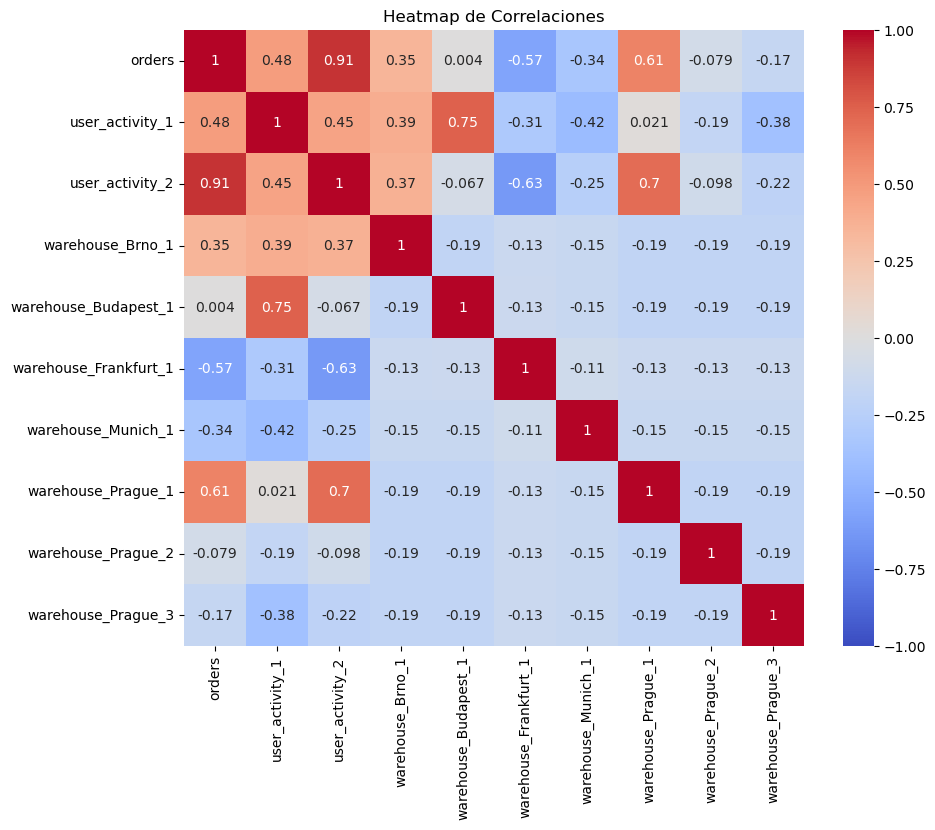

In [19]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_warehouses.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

Notamos que hay mucha correlación entre las sucursales menos en tres (_warehouse Budapest 1_,  _warehouse Prague 2_ y _warehouse Prague 3_), por lo tanto dejamos esas variables como _other_

In [20]:
df_clean["warehouse"] = df_clean["warehouse"].apply(lambda x : "other" if x in ["Budapest_1", "Prague_2", "Prague_3"] else x)
df_clean.warehouse.value_counts()

warehouse
other          3540
Prague_1       1193
Brno_1         1193
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

#### Dataset dias de la semana

Así como debe haber diferencia entre la cantidad de pedidos por día y sucursales en los días feriados y en los no feriados, también debe haberlo entre los días de la semana.

In [21]:
orders_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
counts_per_weekday = {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, "Saturday": 0, "Sunday": 0}
orders_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}
counts_per_mounth = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}

def sum_orders_by_date(row):
    # pasar la fecha a datetime de pandas
    date = datetime.strptime(row["date"], "%Y-%m-%d")
    # tomar el dia de semana que cayo la fecha
    weekday = date.strftime("%A")
    mounth = date.strftime("%B")
    # sumar el numero de ordenes al dia de semana
    orders_per_weekday[weekday] += int(row["orders"])
    counts_per_weekday[weekday] += 1
    orders_per_mounth[mounth] += int(row["orders"])
    counts_per_mounth[mounth] += 1
    

df.apply(sum_orders_by_date, axis=1)

print(orders_per_weekday)
print(counts_per_weekday)
print(orders_per_mounth)
print(counts_per_mounth)

{'Monday': 5755543, 'Tuesday': 5739699, 'Wednesday': 5760388, 'Thursday': 5890880, 'Friday': 6488411, 'Saturday': 5934540, 'Sunday': 5060697}
{'Monday': 1060, 'Tuesday': 1085, 'Wednesday': 1094, 'Thursday': 1089, 'Friday': 1085, 'Saturday': 1085, 'Sunday': 842}
{'January': 4396433, 'February': 4099071, 'March': 3806561, 'April': 2984340, 'May': 2997021, 'June': 2837141, 'July': 2804372, 'August': 2870946, 'September': 3017584, 'October': 3234653, 'November': 3318637, 'December': 4263399}
{'January': 742, 'February': 694, 'March': 670, 'April': 535, 'May': 556, 'June': 546, 'July': 574, 'August': 580, 'September': 580, 'October': 587, 'November': 574, 'December': 702}


In [22]:
# Crear un DataFrame a partir de los diccionarios
weekdays = [weekday[0:3] for weekday in orders_per_weekday.keys()]
mean_per_weekday = [orders_per_weekday[weekday] / counts_per_weekday[weekday] for weekday in orders_per_weekday.keys()]
mounths = [mounth[0:3] for mounth in orders_per_mounth.keys()]
mean_per_mounth = [orders_per_mounth[mounth] / counts_per_mounth[mounth] for mounth in orders_per_mounth.keys()]

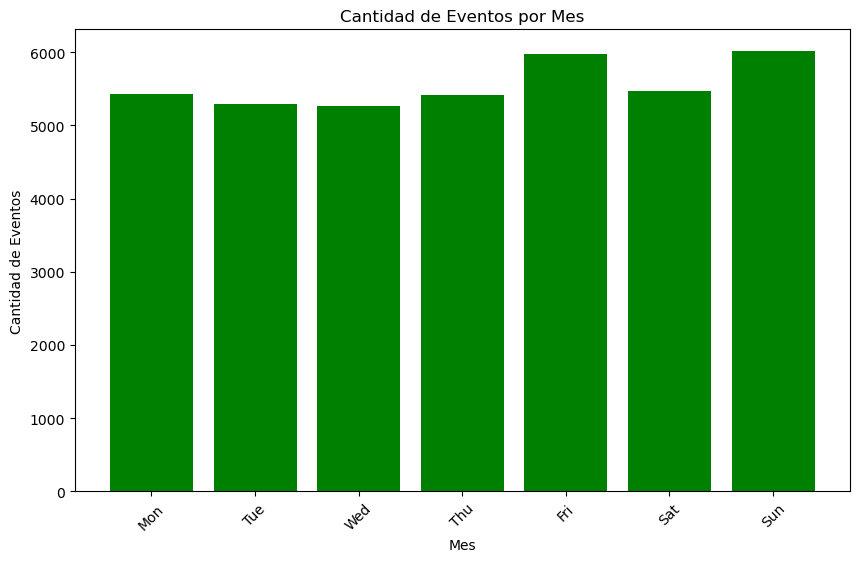

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(weekdays, mean_per_weekday, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

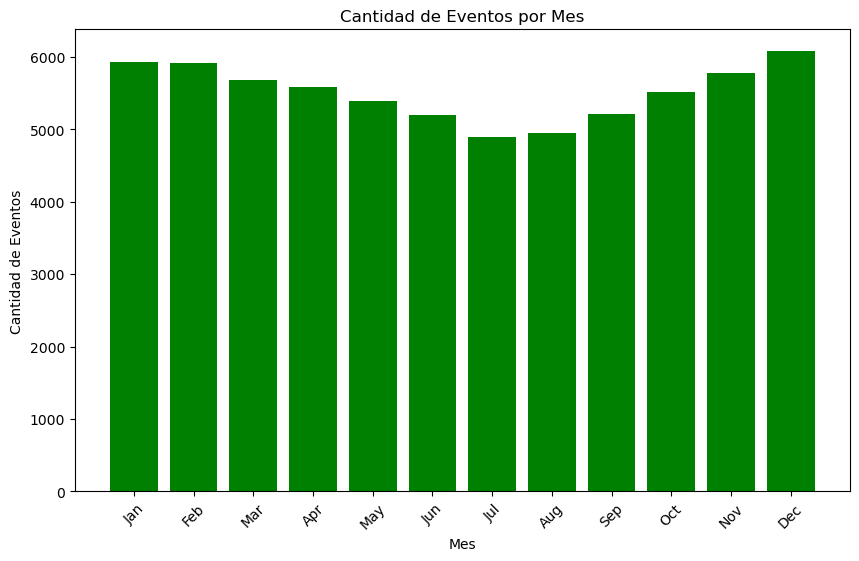

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(mounths, mean_per_mounth, color='green')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Cantidad de Eventos por Mes')
plt.xticks(rotation=45)
plt.show()

In [25]:
df_season = df_clean.copy()
df_season['fecha'] = pd.to_datetime(df['date'])

In [26]:
df_season["Season"] = df_season.fecha.dt.month_name()

In [27]:
def get_season(fecha):
    if fecha in ['December', 'January', 'February']:
        return 'Invierno'
    elif fecha in ['March', 'April', 'May']:
        return 'Primavera'
    elif fecha in ['June', 'July', 'August']:
        return 'Verano'
    elif fecha in ['September', 'October', 'November']:
        return 'Otoño'

In [28]:
df_season['Season'] = df_season.Season.apply(get_season)

In [29]:
df_seasons = pd.concat([df_clean['orders'], pd.get_dummies(df_season.Season).astype('int').add_prefix('Season_')], axis=1)

In [30]:
df_seasons

,orders,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,6895.0,1,0,0,0
1,6584.0,1,0,0,0
2,7030.0,1,0,0,0
3,6550.0,1,0,0,0
4,6910.0,1,0,0,0
...,...,...,...,...,...
7335,6733.0,0,0,1,0
7336,6492.0,0,0,1,0
7337,6661.0,0,0,1,0
7338,6843.0,0,0,1,0


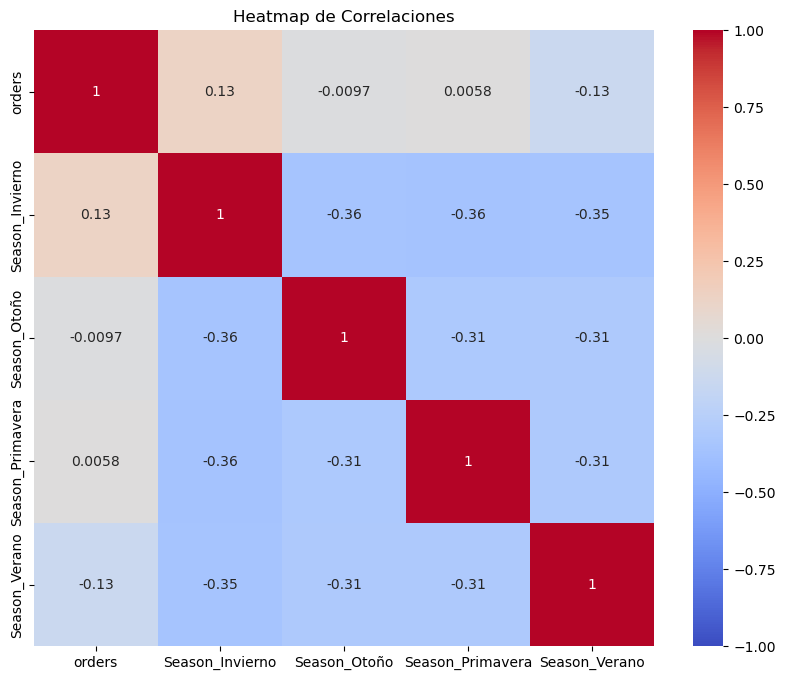

In [31]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_seasons.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [32]:
df_season['Hot'] = df_season.Season.apply(lambda x: 1 if x in ['Verano', 'Primera'] else 0)

In [33]:
df_season

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,fecha,Season,Hot
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,2020-12-05,Invierno,0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,2020-12-06,Invierno,0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,2020-12-07,Invierno,0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,2020-12-08,Invierno,0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,2020-12-09,Invierno,0
...,...,...,...,...,...,...,...,...,...,...,...
7335,other,2024-03-10,6733.0,NaN,0,0,0,0,2024-03-10,Primavera,0
7336,other,2024-03-11,6492.0,NaN,0,0,0,0,2024-03-11,Primavera,0
7337,other,2024-03-12,6661.0,NaN,0,0,0,0,2024-03-12,Primavera,0
7338,other,2024-03-13,6843.0,NaN,0,0,0,0,2024-03-13,Primavera,0


In [34]:
df_season.orders.corr(df_season.Hot)

-0.13284735461473357

In [35]:
df[['orders', 'snow', 'precipitation']].corr()

,orders,snow,precipitation
orders,1.000000,0.093424,0.030428
snow,0.093424,1.000000,0.065120
precipitation,0.030428,0.065120,1.000000


In [36]:
df[['orders', 'holiday', 'mov_change']].corr()

,orders,holiday,mov_change
orders,1.000000,0.018006,-0.040215
holiday,0.018006,1.000000,0.014483
mov_change,-0.040215,0.014483,1.000000


## Conclusiones

- Nos vamos con Warehouse importantes: warehouse_Brno_1, warehouse_Budapest_1, warehouse_Frankfurt_1, warehouse_Munich_1, warehouse_Prague_1, warehouse_Prague_2	y warehouse_Prague_3
- User activities mucha correlación
- Promedio de User activities por warehouse
- Si la fecha pertenece a temporada de calor. En invierno se encuentran valores mas altos
- School holiday tiene correlacion ""alta"" y holidays no

Columnas finales:
- warehouse_Brno-1 (binaria)
- warehouse_Budapest_1 (binaria)
- warehouse_Frankfurt_1 (bianria)
- warehouse_Munich_1 (binaria)
- warehouse_Prague_1 (binaria)
- warehouse_Prague_2 (binaria)
- warehouse_Prague_3 (binaria)
- Promedio user activities por warehouse (numerica)
- school holiday (binaria)
- Hot season (binaria)

## Feature Engineer

In [80]:
df_final = df.drop(["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "blackout", "mov_change", 'id'], axis = 1)
df_final

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,1722.0,32575.0
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,1688.0,32507.0
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,1696.0,32552.0
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,1681.0,32423.0
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,1704.0,32410.0
...,...,...,...,...,...,...,...,...,...,...
7335,Budapest_1,2024-03-10,6733.0,NaN,0,0,0,0,2983.0,27111.0
7336,Budapest_1,2024-03-11,6492.0,NaN,0,0,0,0,2975.0,27133.0
7337,Budapest_1,2024-03-12,6661.0,NaN,0,0,0,0,2974.0,27151.0
7338,Budapest_1,2024-03-13,6843.0,NaN,0,0,0,0,2979.0,27180.0


In [81]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [82]:
df_final = df_final.sort_values(by = "date")

In [83]:
df_final_label = df_final.orders
df_final = df_final.drop(["orders"], axis=1)

# Separando el DataFrame en 80% y 20%
df_final_train, df_final_validation, df_final_train_label, df_final_validation_label = train_test_split(df_final,
                                                    df_final_label, 
                                                    test_size=0.2,
                                                    shuffle=False)

In [84]:
# mean user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean()
means_ua1= df_usact1.to_dict()

PROMEDIO_UA1 = df_usact1.mean()

# max user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].max()
max_ua1= df_usact1.to_dict()

# min user activity 1
df_usact1 = df_final_train[["user_activity_1", 'warehouse']]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].min()
min_ua1= df_usact1.to_dict()

In [85]:
# user activity 2
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean()
PROMEDIO_UA2 = df_usact1.mean()
means_ua2= df_usact2.to_dict()

# max user activity 1
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].max()
max_ua2= df_usact2.to_dict()

# min user activity 1
df_usact2 = df_final_train[["user_activity_2", 'warehouse']]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].min()
min_ua2= df_usact2.to_dict()

In [86]:
df_final_train["mean_user_activity_1"] = df_final_train.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
df_final_train["mean_user_activity_2"] = df_final_train.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
df_final_train["max_user_activity_1"] = df_final_train.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
df_final_train["max_user_activity_2"] = df_final_train.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
df_final_train["min_user_activity_1"] = df_final_train.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
df_final_train["min_user_activity_2"] = df_final_train.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
df_final_train["product_ua"] = df_final_train["mean_user_activity_1"] * df_final_train["mean_user_activity_2"]

city_to_country = {
    'Munich_1': 'Germany',
    'Frankfurt_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Brno_1': 'Czech Republic',
    'Prague_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic'
}

df_final_train['country'] = df_final_train['warehouse'].map(city_to_country)
df_final_train = pd.concat([df_final_train.drop(["country"], axis=1), pd.get_dummies(df_final_train.country).astype('int').add_prefix('country_')], axis=1)
df_final_train = pd.concat([df_final_train.drop(["warehouse"], axis=1), pd.get_dummies(df_final_train.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_train = df_final_train.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_train['hot_season'] = df_final_train.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)
# df_final_train = pd.concat([df_final_train.drop(["holiday_name"], axis=1), pd.get_dummies(df_final_train.holiday_name).astype('int').add_prefix('holiday_name_')], axis=1)


df_final_train['year'] = df_final_train['date'].dt.year
df_final_train['month'] = df_final_train['date'].dt.month
df_final_train['week'] = df_final_train['date'].dt.isocalendar().week
df_final_train['day'] = df_final_train['date'].dt.day
df_final_train['day_of_week'] = df_final_train['date'].dt.dayofweek #numero
# df_final_train['day_of_week'] = df_final_train['date'].dt.day_name() #cadena
df_final_train['year_sin'] = np.sin(2 * np.pi * df_final_train['year'])
df_final_train['year_cos'] = np.cos(2 * np.pi * df_final_train['year'])
df_final_train['month_sin'] = np.sin(2 * np.pi * df_final_train['month'] / 12) 
df_final_train['month_cos'] = np.cos(2 * np.pi * df_final_train['month'] / 12)
df_final_train['week_sin'] = np.sin(2 * np.pi * df_final_train['week'] / 53)
df_final_train['week_cos'] = np.cos(2 * np.pi * df_final_train['week'] / 53)
df_final_train['day_sin'] = np.sin(2 * np.pi * df_final_train['day'] / 31)
df_final_train['day_cos'] = np.cos(2 * np.pi * df_final_train['day'] / 31)
df_final_train['day_of_week_sin'] = np.sin(2 * np.pi * df_final_train['day_of_week'] / 7)
df_final_train['day_of_week_cos'] = np.cos(2 * np.pi * df_final_train['day_of_week'] / 7)
df_final_train["month_name"] = df_final_train.date.dt.month_name()
df_final_train['season'] = df_final_train.month_name.apply(get_season)
df_final_train = pd.concat([df_final_train, pd.get_dummies(df_final_train.season).astype('int').add_prefix('Season_')], axis=1)

df_final_train = df_final_train.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name'], axis = 1)
df_final_train = df_final_train.reset_index().drop(["index"], axis = 1)

df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 5872 non-null   int64  
 1   shops_closed            5872 non-null   int64  
 2   winter_school_holidays  5872 non-null   int64  
 3   school_holidays         5872 non-null   int64  
 4   user_activity_1         5872 non-null   float64
 5   user_activity_2         5872 non-null   float64
 6   mean_user_activity_1    5872 non-null   float64
 7   mean_user_activity_2    5872 non-null   float64
 8   max_user_activity_1     5872 non-null   float64
 9   max_user_activity_2     5872 non-null   float64
 10  min_user_activity_1     5872 non-null   float64
 11  min_user_activity_2     5872 non-null   float64
 12  product_ua              5872 non-null   float64
 13  country_Czech Republic  5872 non-null   int64  
 14  country_Germany         5872 non-null   

In [87]:
df_final_validation["mean_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
df_final_validation["mean_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
df_final_validation["max_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
df_final_validation["max_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
df_final_validation["min_user_activity_1"] = df_final_validation.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
df_final_validation["min_user_activity_2"] = df_final_validation.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
df_final_validation["product_ua"] = df_final_validation["mean_user_activity_1"] * df_final_validation["mean_user_activity_2"]

df_final_validation['country'] = df_final_validation['warehouse'].map(city_to_country)
df_final_validation = pd.concat([df_final_validation.drop(["country"], axis=1), pd.get_dummies(df_final_validation.country).astype('int').add_prefix('country_')], axis=1)
df_final_validation = pd.concat([df_final_validation.drop(["warehouse"], axis=1), pd.get_dummies(df_final_validation.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_final_validation = df_final_validation.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
df_final_validation['hot_season'] = df_final_validation.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

df_final_validation['year'] = df_final_validation['date'].dt.year
df_final_validation['month'] = df_final_validation['date'].dt.month
df_final_validation['week'] = df_final_validation['date'].dt.isocalendar().week
df_final_validation['day'] = df_final_validation['date'].dt.day
df_final_validation['day_of_week'] = df_final_validation['date'].dt.dayofweek #numero
# df_final_validation['day_of_week'] = df_final_validation['date'].dt.day_name() #cadena
df_final_validation['year_sin'] = np.sin(2 * np.pi * df_final_validation['year'])
df_final_validation['year_cos'] = np.cos(2 * np.pi * df_final_validation['year'])
df_final_validation['month_sin'] = np.sin(2 * np.pi * df_final_validation['month'] / 12) 
df_final_validation['month_cos'] = np.cos(2 * np.pi * df_final_validation['month'] / 12)
df_final_validation['week_sin'] = np.sin(2 * np.pi * df_final_validation['week'] / 53)
df_final_validation['week_cos'] = np.cos(2 * np.pi * df_final_validation['week'] / 53)
df_final_validation['day_sin'] = np.sin(2 * np.pi * df_final_validation['day'] / 31)
df_final_validation['day_cos'] = np.cos(2 * np.pi * df_final_validation['day'] / 31)
df_final_validation['day_of_week_sin'] = np.sin(2 * np.pi * df_final_validation['day_of_week'] / 7)
df_final_validation['day_of_week_cos'] = np.cos(2 * np.pi * df_final_validation['day_of_week'] / 7)
df_final_validation["month_name"] = df_final_validation.date.dt.month_name()
df_final_validation['season'] = df_final_validation.month_name.apply(get_season)
df_final_validation = pd.concat([df_final_validation, pd.get_dummies(df_final_validation.season).astype('int').add_prefix('Season_')], axis=1)

df_final_validation = df_final_validation.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name'], axis = 1)
df_final_validation = df_final_validation.reset_index().drop(["index"], axis = 1)

df_final_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 1468 non-null   int64  
 1   shops_closed            1468 non-null   int64  
 2   winter_school_holidays  1468 non-null   int64  
 3   school_holidays         1468 non-null   int64  
 4   user_activity_1         1468 non-null   float64
 5   user_activity_2         1468 non-null   float64
 6   mean_user_activity_1    1468 non-null   float64
 7   mean_user_activity_2    1468 non-null   float64
 8   max_user_activity_1     1468 non-null   float64
 9   max_user_activity_2     1468 non-null   float64
 10  min_user_activity_1     1468 non-null   float64
 11  min_user_activity_2     1468 non-null   float64
 12  product_ua              1468 non-null   float64
 13  country_Czech Republic  1468 non-null   int64  
 14  country_Germany         1468 non-null   

In [88]:
df_final_train

,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2,mean_user_activity_1,mean_user_activity_2,max_user_activity_1,max_user_activity_2,min_user_activity_1,min_user_activity_2,product_ua,country_Czech Republic,country_Germany,country_Hungary,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season,year_sin,year_cos,month_sin,month_cos,week_sin,week_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,0,0,0,0,1722.0,32575.0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,1,0,0,0,0,0,1,0,-8.073961e-13,1.0,-2.449294e-16,1.0,-0.456629,0.889657,0.848644,0.528964,-0.974928,-0.222521,1,0,0,0
1,0,0,0,0,1317.0,18462.0,1303.776749,20996.281893,1435.0,24401.0,1248.0,17799.0,2.737446e+07,1,0,0,0,0,0,0,0,-8.073961e-13,1.0,-2.449294e-16,1.0,-0.456629,0.889657,0.848644,0.528964,-0.974928,-0.222521,1,0,0,0
2,0,0,0,0,964.0,17693.0,956.427544,18871.905447,1058.0,21411.0,914.0,16254.0,1.804961e+07,1,0,0,0,0,0,0,0,-8.073961e-13,1.0,-2.449294e-16,1.0,-0.456629,0.889657,0.848644,0.528964,-0.974928,-0.222521,1,0,0,0
3,0,0,0,0,3046.0,17840.0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,0,0,1,0,0,0,0,0,-8.073961e-13,1.0,-2.449294e-16,1.0,-0.456629,0.889657,0.848644,0.528964,-0.974928,-0.222521,1,0,0,0
4,0,0,0,0,2332.0,27392.0,2324.431070,29416.394033,2685.0,34040.0,2245.0,25037.0,6.837638e+07,1,0,0,1,0,0,0,0,-8.073961e-13,1.0,-2.449294e-16,1.0,-0.456629,0.889657,0.848644,0.528964,-0.974928,-0.222521,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,0,0,0,0,1657.0,36209.0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,1,0,0,0,0,0,1,1,-6.447061e-13,1.0,-8.660254e-01,-0.5,-0.508531,-0.861044,0.937752,0.347305,-0.781831,0.623490,0,0,0,1
5868,0,0,0,0,2962.0,22432.0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,0,0,1,0,0,0,0,1,-6.447061e-13,1.0,-8.660254e-01,-0.5,-0.508531,-0.861044,0.937752,0.347305,-0.781831,0.623490,0,0,0,1
5869,0,0,0,0,1287.0,21491.0,1303.776749,20996.281893,1435.0,24401.0,1248.0,17799.0,2.737446e+07,1,0,0,0,0,0,0,1,-6.447061e-13,1.0,-8.660254e-01,-0.5,-0.508531,-0.861044,0.937752,0.347305,-0.781831,0.623490,0,0,0,1
5870,0,0,0,0,950.0,19482.0,956.427544,18871.905447,1058.0,21411.0,914.0,16254.0,1.804961e+07,1,0,0,0,0,0,0,1,-6.447061e-13,1.0,-8.660254e-01,-0.5,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1


In [89]:
pd.concat([df_final_train, df_final_train_label], axis = 1).corr().orders

holiday                   0.009638
shops_closed              0.034429
winter_school_holidays    0.023137
school_holidays          -0.092109
user_activity_1           0.143796
user_activity_2           0.042944
mean_user_activity_1      0.109684
mean_user_activity_2      0.163716
max_user_activity_1       0.094312
max_user_activity_2       0.154339
min_user_activity_1       0.112469
min_user_activity_2       0.182080
product_ua                0.138452
country_Czech Republic    0.147928
country_Germany          -0.220393
country_Hungary           0.038615
warehouse_Brno_1          0.045879
warehouse_Frankfurt_1    -0.193218
warehouse_Munich_1       -0.110045
warehouse_Prague_1        0.047365
hot_season               -0.245195
year_sin                  0.474401
year_cos                       NaN
month_sin                 0.055590
month_cos                 0.258452
week_sin                 -0.017627
week_cos                  0.280161
day_sin                   0.037589
day_cos             

In [90]:
df_final_validation

,holiday,shops_closed,winter_school_holidays,school_holidays,user_activity_1,user_activity_2,mean_user_activity_1,mean_user_activity_2,max_user_activity_1,max_user_activity_2,min_user_activity_1,min_user_activity_2,product_ua,country_Czech Republic,country_Germany,country_Hungary,warehouse_Brno_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,hot_season,year_sin,year_cos,month_sin,month_cos,week_sin,week_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,Season_Invierno,Season_Otoño,Season_Primavera,Season_Verano
0,0,0,0,0,1298.0,21529.0,1303.776749,20996.281893,1435.0,24401.0,1248.0,17799.0,2.737446e+07,1,0,0,0,0,0,0,1,-6.447061e-13,1.0,-0.866025,-5.000000e-01,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1
1,0,0,0,0,2365.0,30563.0,2324.431070,29416.394033,2685.0,34040.0,2245.0,25037.0,6.837638e+07,1,0,0,1,0,0,0,1,-6.447061e-13,1.0,-0.866025,-5.000000e-01,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1
2,0,0,0,0,820.0,6257.0,852.771493,5812.461538,993.0,6520.0,801.0,2691.0,4.956702e+06,0,1,0,0,1,0,0,1,-6.447061e-13,1.0,-0.866025,-5.000000e-01,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1
3,0,0,0,0,1682.0,36331.0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,1,0,0,0,0,0,1,1,-6.447061e-13,1.0,-0.866025,-5.000000e-01,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1
4,0,0,0,0,2964.0,22467.0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,0,0,1,0,0,0,0,1,-6.447061e-13,1.0,-0.866025,-5.000000e-01,-0.6068,-0.794854,0.988468,0.151428,0.000000,1.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0,0,0,0,2368.0,37630.0,2324.431070,29416.394033,2685.0,34040.0,2245.0,25037.0,6.837638e+07,1,0,0,1,0,0,0,1,1.585375e-14,1.0,1.000000,6.123234e-17,0.964636,0.263587,0.101168,-0.994869,-0.433884,-0.900969,0,0,1,0
1464,0,0,0,0,955.0,22037.0,956.427544,18871.905447,1058.0,21411.0,914.0,16254.0,1.804961e+07,1,0,0,0,0,0,0,1,1.585375e-14,1.0,1.000000,6.123234e-17,0.964636,0.263587,0.101168,-0.994869,-0.433884,-0.900969,0,0,1,0
1465,0,0,0,0,1692.0,42917.0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,1,0,0,0,0,0,1,1,1.585375e-14,1.0,1.000000,6.123234e-17,0.964636,0.263587,0.101168,-0.994869,-0.433884,-0.900969,0,0,1,0
1466,0,0,0,0,1325.0,25481.0,1303.776749,20996.281893,1435.0,24401.0,1248.0,17799.0,2.737446e+07,1,0,0,0,0,0,0,1,1.585375e-14,1.0,1.000000,6.123234e-17,0.964636,0.263587,0.101168,-0.994869,-0.433884,-0.900969,0,0,1,0


In [91]:
all_columns = list(df_final_train.columns)

In [92]:
# Definir el orden de las columnas deseado
column_order = ['country_Czech Republic', 'country_Germany', 'warehouse_Frankfurt_1', 'warehouse_Munich_1', 'mean_user_activity_1','mean_user_activity_2','max_user_activity_1','max_user_activity_2','min_user_activity_1','min_user_activity_2','product_ua','month_cos','week_cos']


In [93]:
# Reordenar las columnas del DataFrame según el orden deseado
df_final_validation = df_final_validation[column_order].round(5)
df_final_train = df_final_train[column_order].round(5)


In [94]:
df_final_train

,country_Czech Republic,country_Germany,warehouse_Frankfurt_1,warehouse_Munich_1,mean_user_activity_1,mean_user_activity_2,max_user_activity_1,max_user_activity_2,min_user_activity_1,min_user_activity_2,product_ua,month_cos,week_cos
0,1,0,0,0,1673.67284,35952.60288,2035.0,41952.0,1564.0,30403.0,6.017289e+07,1.0,0.88966
1,1,0,0,0,1303.77675,20996.28189,1435.0,24401.0,1248.0,17799.0,2.737446e+07,1.0,0.88966
2,1,0,0,0,956.42754,18871.90545,1058.0,21411.0,914.0,16254.0,1.804961e+07,1.0,0.88966
3,0,0,0,0,2989.89563,21435.60277,3437.0,24488.0,2921.0,17478.0,6.409022e+07,1.0,0.88966
4,1,0,0,0,2324.43107,29416.39403,2685.0,34040.0,2245.0,25037.0,6.837638e+07,1.0,0.88966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,1,0,0,0,1673.67284,35952.60288,2035.0,41952.0,1564.0,30403.0,6.017289e+07,-0.5,-0.86104
5868,0,0,0,0,2989.89563,21435.60277,3437.0,24488.0,2921.0,17478.0,6.409022e+07,-0.5,-0.86104
5869,1,0,0,0,1303.77675,20996.28189,1435.0,24401.0,1248.0,17799.0,2.737446e+07,-0.5,-0.86104
5870,1,0,0,0,956.42754,18871.90545,1058.0,21411.0,914.0,16254.0,1.804961e+07,-0.5,-0.79485


## XGboost

In [52]:
# Crear el regressor XGBoost
xgb_reg = xgb.XGBRegressor()

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'max_depth': [2,3, 6, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'n_estimators': [50, 65, 80, 100, 200, 300],
    'colsample_bytree': [0.3, 0.6, 0.7, 1]
}

In [53]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

In [54]:
# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(df_final_train, df_final_train_label)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.6, 0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [2, 3, 6, 9, 11, 13, 15],
                         'n_estimators': [50, 65, 80, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [55]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Mejor combinación de hiperparámetros: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred = np.round(best_model.predict(df_final_validation))

# Evaluar el rendimiento del modelo
mse = mean_squared_error(df_final_validation_label, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mejor combinación de hiperparámetros: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error: 2049770.36


In [56]:
list(y_pred)

[4579.0,
 6516.0,
 1363.0,
 7442.0,
 5050.0,
 6516.0,
 1363.0,
 7442.0,
 4579.0,
 5050.0,
 2771.0,
 4191.0,
 7442.0,
 4191.0,
 2771.0,
 6516.0,
 5050.0,
 4579.0,
 1363.0,
 2771.0,
 5050.0,
 7442.0,
 4191.0,
 6516.0,
 1363.0,
 4579.0,
 4191.0,
 2771.0,
 1363.0,
 7442.0,
 5050.0,
 4579.0,
 6516.0,
 6516.0,
 4579.0,
 4191.0,
 7442.0,
 1363.0,
 2771.0,
 5050.0,
 7442.0,
 5050.0,
 6516.0,
 4191.0,
 4579.0,
 1363.0,
 7442.0,
 2771.0,
 4579.0,
 5050.0,
 4191.0,
 6516.0,
 1363.0,
 4191.0,
 4579.0,
 7442.0,
 6516.0,
 5050.0,
 2771.0,
 1363.0,
 4191.0,
 6516.0,
 7442.0,
 4579.0,
 5050.0,
 6516.0,
 2771.0,
 5050.0,
 4191.0,
 4579.0,
 1363.0,
 7442.0,
 6516.0,
 2771.0,
 5050.0,
 4191.0,
 7442.0,
 1363.0,
 4579.0,
 4191.0,
 6516.0,
 2771.0,
 5050.0,
 7442.0,
 1363.0,
 4579.0,
 4579.0,
 7442.0,
 6516.0,
 4191.0,
 1363.0,
 6516.0,
 4579.0,
 7442.0,
 2771.0,
 4191.0,
 5050.0,
 1363.0,
 5050.0,
 7442.0,
 4191.0,
 2771.0,
 4579.0,
 6516.0,
 4579.0,
 6516.0,
 4191.0,
 1363.0,
 2771.0,
 7442.0,
 5050.0,
 

In [57]:
df_final_validation_label

3358     5020.0
2165     7319.0
5999     1565.0
972      8455.0
7125     5607.0
         ...   
2385    10777.0
4771     6408.0
1192    11917.0
3578     7140.0
6185     1916.0
Name: orders, Length: 1468, dtype: float64

## Redes Neuronales

In [58]:
# Escalar los datos
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_final_train)
df_validation_scaled = scaler.transform(df_final_validation)

/home/lminervino18/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
470/470 - 3s - 6ms/step - loss: 26036128.0000 - val_loss: 13209376.0000
Epoch 2/100
470/470 - 1s - 2ms/step - loss: 3134484.7500 - val_loss: 1533515.0000
Epoch 3/100
470/470 - 1s - 2ms/step - loss: 624757.6875 - val_loss: 673613.4375
Epoch 4/100
470/470 - 1s - 2ms/step - loss: 486229.4062 - val_loss: 569308.4375
Epoch 5/100
470/470 - 1s - 2ms/step - loss: 460502.7500 - val_loss: 566031.1875
Epoch 6/100
470/470 - 1s - 2ms/step - loss: 443901.4688 - val_loss: 511605.5000
Epoch 7/100
470/470 - 1s - 2ms/step - loss: 433059.8438 - val_loss: 489751.6250
Epoch 8/100
470/470 - 1s - 2ms/step - loss: 425718.4062 - val_loss: 555912.2500
Epoch 9/100
470/470 - 1s - 2ms/step - loss: 418369.0938 - val_loss: 469922.9062
Epoch 10/100
470/470 - 1s - 2ms/step - loss: 414038.1562 - val_loss: 481161.0000
Epoch 11/100
470/470 - 1s - 2ms/step - loss: 410255.7812 - val_loss: 458420.7812
Epoch 12/100
470/470 - 1s - 2ms/step - loss: 407708.0938 - val_loss: 514744.5938
Epoch 13/100
470/470 - 1s - 2ms

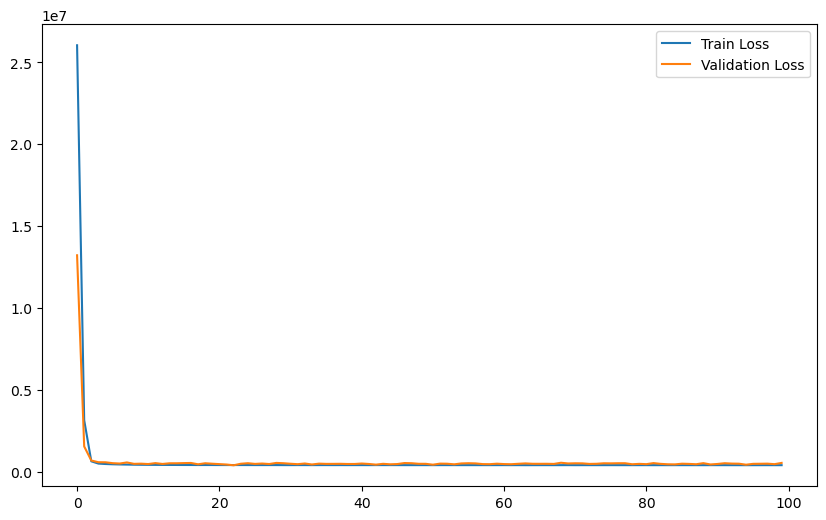

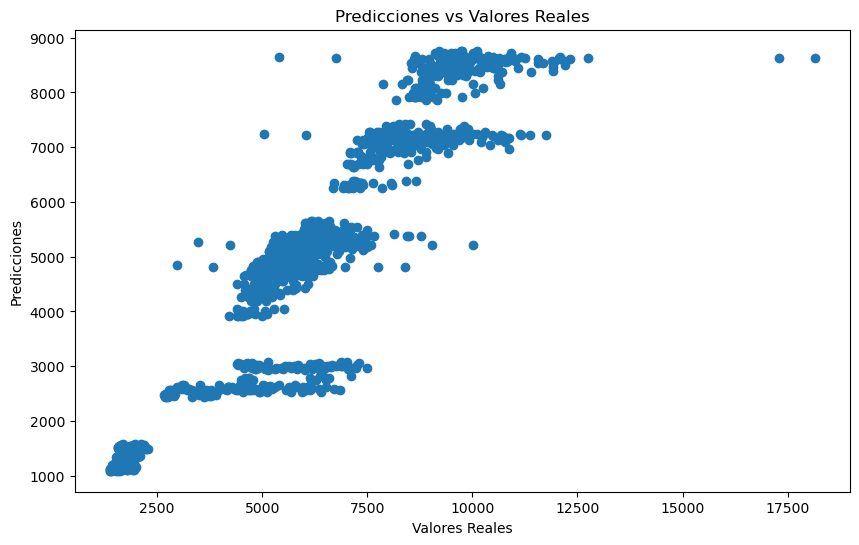

In [59]:
# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=df_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
history = model.fit(df_train_scaled, df_final_train_label, epochs=100, batch_size=10, verbose=2, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(df_validation_scaled, df_final_validation_label, verbose=2)
print(f'Test Loss: {loss}')

# Hacer predicciones
y_pred = model.predict(df_validation_scaled)

# Calcular el error
test_mse = mean_squared_error(df_final_validation_label, y_pred)
print(f'Test MSE: {test_mse}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(df_final_validation_label, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

## Modelo Random

In [60]:
model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((df_final_train.shape[0], 10))
test_meta_features = np.zeros((df_final_validation.shape[0], 10))

for train_index, val_index in kf.split(df_final_train):
    X_train_fold, X_val_fold = df_final_train.iloc[train_index], df_final_train.iloc[val_index]
    y_train_fold, y_val_fold = df_final_train_label.iloc[train_index], df_final_train_label.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(df_final_validation)
    test_model2_pred = model2.predict(df_final_validation)
    test_model3_pred = model3.predict(df_final_validation)
    test_model4_pred = model4.predict(df_final_validation)
    test_model5_pred = model5.predict(df_final_validation)
    test_model6_pred = model6.predict(df_final_validation)
    test_model7_pred = model7.predict(df_final_validation)
    test_model8_pred = model8.predict(df_final_validation)
    test_model9_pred = model9.predict(df_final_validation)
    test_model10_pred = model10.predict(df_final_validation)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 4697, number of used features: 15
[LightGBM] [Info] Start training from score 5367.489887


/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+09, tolerance: 2.004e+06
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.052279
0:	learn: 1971.6616032	total: 49.7ms	remaining: 49.7s
1:	learn: 1884.3471319	total: 51.1ms	remaining: 25.5s
2:	learn: 1798.5950409	total: 52.6ms	remaining: 17.5s
3:	learn: 1721.3107682	total: 53.8ms	remaining: 13.4s
4:	learn: 1646.4627540	total: 55.6ms	remaining: 11.1s
5:	learn: 1574.6957398	total: 57.1ms	remaining: 9.46s
6:	learn: 1508.1684877	total: 58.6ms	remaining: 8.31s
7:	learn: 1445.9213476	total: 60.1ms	remaining: 7.45s
8:	learn: 1387.0023118	total: 61.5ms	remaining: 6.78s
9:	learn: 1332.1612715	total: 63.1ms	remaining: 6.24s
10:	learn: 1280.5252244	total: 64.7ms	remaining: 5.81s
11:	learn: 1231.6514161	total: 66.2ms	remaining: 5.45s
12:	learn: 1186.7004890	total: 67.8ms	remaining: 5.15s
13:	learn: 1145.2094080	total: 69.1ms	remaining: 4.87s
14:	learn: 1107.0261824	total: 70.6ms	remaining: 4.64s
15:	learn: 1069.4161757	total: 72.4ms	remaining: 4.45s
16:	learn: 1034.7596624	total: 74.1ms	remaining: 4.29s
17:	learn: 1001.6287702	total: 75.7ms	remaini

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+09, tolerance: 1.995e+06
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.052279
0:	learn: 1967.1741674	total: 1.57ms	remaining: 1.57s
1:	learn: 1880.3415963	total: 2.83ms	remaining: 1.41s
2:	learn: 1795.0860591	total: 4.41ms	remaining: 1.47s
3:	learn: 1718.2539050	total: 5.58ms	remaining: 1.39s
4:	learn: 1643.8973125	total: 7.17ms	remaining: 1.43s
5:	learn: 1572.5830275	total: 8.79ms	remaining: 1.46s
6:	learn: 1506.4873656	total: 10.3ms	remaining: 1.46s
7:	learn: 1446.8192519	total: 11.6ms	remaining: 1.43s
8:	learn: 1389.0178061	total: 13ms	remaining: 1.43s
9:	learn: 1333.2513098	total: 14.6ms	remaining: 1.44s
10:	learn: 1281.4170423	total: 16.2ms	remaining: 1.46s
11:	learn: 1232.0925226	total: 17.8ms	remaining: 1.46s
12:	learn: 1186.1899518	total: 19.5ms	remaining: 1.48s
13:	learn: 1146.1433422	total: 21.2ms	remaining: 1.49s
14:	learn: 1107.1642581	total: 23.1ms	remaining: 1.51s
15:	learn: 1069.8343669	total: 24.9ms	remaining: 1.53s
16:	learn: 1038.2802605	total: 26.4ms	remaining: 1.52s
17:	learn: 1005.3438777	total: 28.1ms	remaining

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+09, tolerance: 1.982e+06
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.052281
0:	learn: 1961.0407500	total: 1.98ms	remaining: 1.98s
1:	learn: 1874.7288989	total: 3.93ms	remaining: 1.96s
2:	learn: 1790.1975144	total: 5.75ms	remaining: 1.91s
3:	learn: 1713.8573232	total: 7ms	remaining: 1.74s
4:	learn: 1640.0325209	total: 8.75ms	remaining: 1.74s
5:	learn: 1569.4035088	total: 10.2ms	remaining: 1.7s
6:	learn: 1503.8469538	total: 11.9ms	remaining: 1.69s
7:	learn: 1442.3886558	total: 13.4ms	remaining: 1.66s
8:	learn: 1383.9731809	total: 15ms	remaining: 1.65s
9:	learn: 1329.6490210	total: 16.5ms	remaining: 1.64s
10:	learn: 1279.1532009	total: 18.4ms	remaining: 1.66s
11:	learn: 1231.9567176	total: 20ms	remaining: 1.65s
12:	learn: 1190.3715042	total: 21.3ms	remaining: 1.62s
13:	learn: 1147.7267278	total: 23ms	remaining: 1.62s
14:	learn: 1109.0761555	total: 24.7ms	remaining: 1.62s
15:	learn: 1072.2833230	total: 26.5ms	remaining: 1.63s
16:	learn: 1040.8226051	total: 28ms	remaining: 1.62s
17:	learn: 1009.4306760	total: 29.8ms	remaining: 1.62s
18

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+09, tolerance: 1.963e+06
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.052281
0:	learn: 1951.1645759	total: 1.4ms	remaining: 1.4s
1:	learn: 1864.7623260	total: 2.54ms	remaining: 1.27s
2:	learn: 1780.0574415	total: 4.04ms	remaining: 1.34s
3:	learn: 1703.5877420	total: 5.33ms	remaining: 1.33s
4:	learn: 1629.5172741	total: 6.71ms	remaining: 1.33s
5:	learn: 1558.6612027	total: 8.2ms	remaining: 1.36s
6:	learn: 1492.8244415	total: 9.54ms	remaining: 1.35s
7:	learn: 1433.2306528	total: 10.7ms	remaining: 1.32s
8:	learn: 1375.6152899	total: 11.9ms	remaining: 1.31s
9:	learn: 1320.2204696	total: 13.5ms	remaining: 1.34s
10:	learn: 1268.5425110	total: 14.9ms	remaining: 1.34s
11:	learn: 1219.5321589	total: 16.4ms	remaining: 1.35s
12:	learn: 1173.8953588	total: 17.9ms	remaining: 1.35s
13:	learn: 1131.1532389	total: 19.3ms	remaining: 1.36s
14:	learn: 1091.5969730	total: 20.8ms	remaining: 1.36s
15:	learn: 1056.3249083	total: 22.2ms	remaining: 1.36s
16:	learn: 1021.7411663	total: 23.7ms	remaining: 1.37s
17:	learn: 989.3458159	total: 25.1ms	remaining: 

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+09, tolerance: 2.008e+06
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.052281
0:	learn: 1973.3936161	total: 1.78ms	remaining: 1.78s
1:	learn: 1886.2742458	total: 3.98ms	remaining: 1.99s
2:	learn: 1800.8781686	total: 5.72ms	remaining: 1.9s
3:	learn: 1723.7984847	total: 7.09ms	remaining: 1.76s
4:	learn: 1649.3964831	total: 8.69ms	remaining: 1.73s
5:	learn: 1579.1098664	total: 10ms	remaining: 1.66s
6:	learn: 1512.9822617	total: 11.6ms	remaining: 1.64s
7:	learn: 1451.1468408	total: 13.1ms	remaining: 1.63s
8:	learn: 1392.5014605	total: 14.7ms	remaining: 1.62s
9:	learn: 1336.4146997	total: 16.3ms	remaining: 1.61s
10:	learn: 1285.0708760	total: 17.9ms	remaining: 1.61s
11:	learn: 1236.1245828	total: 19.4ms	remaining: 1.6s
12:	learn: 1191.3995206	total: 20.9ms	remaining: 1.59s
13:	learn: 1150.5803588	total: 22.2ms	remaining: 1.56s
14:	learn: 1112.6179470	total: 23.5ms	remaining: 1.54s
15:	learn: 1075.2174867	total: 24.9ms	remaining: 1.53s
16:	learn: 1041.9603662	total: 26.1ms	remaining: 1.51s
17:	learn: 1010.5977908	total: 27.4ms	remaining: 

In [61]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

mape = mean_absolute_percentage_error(df_final_validation_label, final_pred)
print(f'Final Model MAPE: {mape:.4f}')

Final Model MAPE: 0.1753


## Submission

In [95]:
# Generamos un dataframe del dataset de entrenamiento
test =  pd.read_csv('test.csv')
test

,warehouse,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2024-03-16,NaN,0,0,0,0,Prague_1_2024-03-16
1,Prague_1,2024-03-17,NaN,0,0,0,0,Prague_1_2024-03-17
2,Prague_1,2024-03-18,NaN,0,0,0,0,Prague_1_2024-03-18
3,Prague_1,2024-03-19,NaN,0,0,0,0,Prague_1_2024-03-19
4,Prague_1,2024-03-20,NaN,0,0,0,0,Prague_1_2024-03-20
...,...,...,...,...,...,...,...,...
392,Budapest_1,2024-05-11,NaN,0,0,0,0,Budapest_1_2024-05-11
393,Budapest_1,2024-05-12,NaN,0,0,0,0,Budapest_1_2024-05-12
394,Budapest_1,2024-05-13,NaN,0,0,0,0,Budapest_1_2024-05-13
395,Budapest_1,2024-05-14,NaN,0,0,0,0,Budapest_1_2024-05-14


In [96]:
test['date'] = pd.to_datetime(test['date'])
test["mean_user_activity_1"] = test.warehouse.apply(lambda x: means_ua1.get(x, PROMEDIO_UA1))
test["mean_user_activity_2"] = test.warehouse.apply(lambda x: means_ua2.get(x, PROMEDIO_UA2))
test["max_user_activity_1"] = test.warehouse.apply(lambda x: max_ua1.get(x, PROMEDIO_UA1))
test["max_user_activity_2"] = test.warehouse.apply(lambda x: max_ua2.get(x, PROMEDIO_UA2))
test["min_user_activity_1"] = test.warehouse.apply(lambda x: min_ua1.get(x, PROMEDIO_UA1))
test["min_user_activity_2"] = test.warehouse.apply(lambda x: min_ua2.get(x, PROMEDIO_UA2))
test["product_ua"] = test["mean_user_activity_1"] * test["mean_user_activity_2"]

test['country'] = test['warehouse'].map(city_to_country)
test = pd.concat([test.drop(["country"], axis=1), pd.get_dummies(test.country).astype('int').add_prefix('country_')], axis=1)
test = pd.concat([test.drop(["warehouse"], axis=1), pd.get_dummies(test.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
test = test.drop(["warehouse_Budapest_1", "warehouse_Prague_2", "warehouse_Prague_3"], axis=1)
test['hot_season'] = test.date.apply(lambda x: 1 if 2 < x.month < 9 else 0)

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['week'] = test['date'].dt.isocalendar().week
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek #numero
# test['day_of_week'] = test['date'].dt.day_name() #cadena
test['year_sin'] = np.sin(2 * np.pi * test['year'])
test['year_cos'] = np.cos(2 * np.pi * test['year'])
test['month_sin'] = np.sin(2 * np.pi * test['month'] / 12) 
test['month_cos'] = np.cos(2 * np.pi * test['month'] / 12)
test['week_sin'] = np.sin(2 * np.pi * test['week'] / 53)
test['week_cos'] = np.cos(2 * np.pi * test['week'] / 53)
test['day_sin'] = np.sin(2 * np.pi * test['day'] / 31)
test['day_cos'] = np.cos(2 * np.pi * test['day'] / 31)
test['day_of_week_sin'] = np.sin(2 * np.pi * test['day_of_week'] / 7)
test['day_of_week_cos'] = np.cos(2 * np.pi * test['day_of_week'] / 7)
test["month_name"] = test.date.dt.month_name()
test['season'] = test.month_name.apply(get_season)
test = pd.concat([test, pd.get_dummies(test.season).astype('int').add_prefix('Season_')], axis=1)

test = test.drop(['date', 'year', 'month', 'week', 'day', 'day_of_week', 'month_name', 'season', 'holiday_name'], axis = 1)
test = test.reset_index().drop(["index"], axis = 1)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holiday                 397 non-null    int64  
 1   shops_closed            397 non-null    int64  
 2   winter_school_holidays  397 non-null    int64  
 3   school_holidays         397 non-null    int64  
 4   id                      397 non-null    object 
 5   mean_user_activity_1    397 non-null    float64
 6   mean_user_activity_2    397 non-null    float64
 7   max_user_activity_1     397 non-null    float64
 8   max_user_activity_2     397 non-null    float64
 9   min_user_activity_1     397 non-null    float64
 10  min_user_activity_2     397 non-null    float64
 11  product_ua              397 non-null    float64
 12  country_Czech Republic  397 non-null    int64  
 13  country_Germany         397 non-null    int64  
 14  country_Hungary         397 non-null    in

In [97]:
ids = test.id
test = test.drop(["id"], axis=1)

In [98]:
df_final_train.columns

Index(['country_Czech Republic', 'country_Germany', 'warehouse_Frankfurt_1',
       'warehouse_Munich_1', 'mean_user_activity_1', 'mean_user_activity_2',
       'max_user_activity_1', 'max_user_activity_2', 'min_user_activity_1',
       'min_user_activity_2', 'product_ua', 'month_cos', 'week_cos'],
      dtype='object')

In [99]:
test[column_order]

,country_Czech Republic,country_Germany,warehouse_Frankfurt_1,warehouse_Munich_1,mean_user_activity_1,mean_user_activity_2,max_user_activity_1,max_user_activity_2,min_user_activity_1,min_user_activity_2,product_ua,month_cos,week_cos
0,1,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,6.123234e-17,0.263587
1,1,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,6.123234e-17,0.263587
2,1,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,6.123234e-17,0.147647
3,1,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,6.123234e-17,0.147647
4,1,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,6.123234e-17,0.147647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,-8.660254e-01,-0.630088
393,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,-8.660254e-01,-0.630088
394,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,-8.660254e-01,-0.717507
395,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,-8.660254e-01,-0.717507


In [100]:
test = test[column_order]

In [101]:
test

,country_Czech Republic,country_Germany,warehouse_Frankfurt_1,warehouse_Munich_1,mean_user_activity_1,mean_user_activity_2,max_user_activity_1,max_user_activity_2,min_user_activity_1,min_user_activity_2,product_ua,month_cos,week_cos
0,1,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,6.123234e-17,0.263587
1,1,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,6.123234e-17,0.263587
2,1,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,6.123234e-17,0.147647
3,1,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,6.123234e-17,0.147647
4,1,0,0,0,1673.672840,35952.602881,2035.0,41952.0,1564.0,30403.0,6.017289e+07,6.123234e-17,0.147647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,-8.660254e-01,-0.630088
393,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,-8.660254e-01,-0.630088
394,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,-8.660254e-01,-0.717507
395,0,0,0,0,2989.895634,21435.602769,3437.0,24488.0,2921.0,17478.0,6.409022e+07,-8.660254e-01,-0.717507


In [102]:
model1 = XGBRegressor(random_state=42)
model2 = LGBMRegressor(random_state=42)
model3 = MLPRegressor(random_state=42)
model4 = RandomForestRegressor(random_state=42)
model5 = ExtraTreesRegressor(random_state=42)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=42)
model8 = AdaBoostRegressor(random_state=42)
model9 = ElasticNet()
model10 = CatBoostRegressor(random_state=42)
meta_model = GradientBoostingRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((df_final_train.shape[0], 10))
test_meta_features = np.zeros((test.shape[0], 10))

for train_index, val_index in kf.split(df_final_train):
    X_train_fold, X_val_fold = df_final_train.iloc[train_index], df_final_train.iloc[val_index]
    y_train_fold, y_val_fold = df_final_train_label.iloc[train_index], df_final_train_label.iloc[val_index]

    model1.fit(X_train_fold, y_train_fold)
    model2.fit(X_train_fold, y_train_fold)
    model3.fit(X_train_fold, y_train_fold)
    model4.fit(X_train_fold, y_train_fold)
    model5.fit(X_train_fold, y_train_fold)
    model6.fit(X_train_fold, y_train_fold)
    model7.fit(X_train_fold, y_train_fold)
    model8.fit(X_train_fold, y_train_fold)
    model9.fit(X_train_fold, y_train_fold)
    model10.fit(X_train_fold, y_train_fold)
    
    val_model1_pred = model1.predict(X_val_fold)
    val_model2_pred = model2.predict(X_val_fold)
    val_model3_pred = model3.predict(X_val_fold)
    val_model4_pred = model4.predict(X_val_fold)
    val_model5_pred = model5.predict(X_val_fold)
    val_model6_pred = model6.predict(X_val_fold)
    val_model7_pred = model7.predict(X_val_fold)
    val_model8_pred = model8.predict(X_val_fold)
    val_model9_pred = model9.predict(X_val_fold)
    val_model10_pred = model10.predict(X_val_fold)
    
    train_meta_features[val_index, 0] = val_model1_pred
    train_meta_features[val_index, 1] = val_model2_pred
    train_meta_features[val_index, 2] = val_model3_pred
    train_meta_features[val_index, 3] = val_model4_pred
    train_meta_features[val_index, 4] = val_model5_pred
    train_meta_features[val_index, 5] = val_model6_pred
    train_meta_features[val_index, 6] = val_model7_pred
    train_meta_features[val_index, 7] = val_model8_pred
    train_meta_features[val_index, 8] = val_model9_pred
    train_meta_features[val_index, 9] = val_model10_pred
    
    test_model1_pred = model1.predict(test)
    test_model2_pred = model2.predict(test)
    test_model3_pred = model3.predict(test)
    test_model4_pred = model4.predict(test)
    test_model5_pred = model5.predict(test)
    test_model6_pred = model6.predict(test)
    test_model7_pred = model7.predict(test)
    test_model8_pred = model8.predict(test)
    test_model9_pred = model9.predict(test)
    test_model10_pred = model10.predict(test)
    
    test_meta_features[:, 0] += test_model1_pred
    test_meta_features[:, 1] += test_model2_pred
    test_meta_features[:, 2] += test_model3_pred
    test_meta_features[:, 3] += test_model4_pred
    test_meta_features[:, 4] += test_model5_pred
    test_meta_features[:, 5] += test_model6_pred
    test_meta_features[:, 6] += test_model7_pred
    test_meta_features[:, 7] += test_model8_pred
    test_meta_features[:, 8] += test_model9_pred
    test_meta_features[:, 9] += test_model10_pred

test_meta_features /= kf.n_splits

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 4697, number of used features: 13
[LightGBM] [Info] Start training from score 5367.489887


/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+09, tolerance: 2.004e+06
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.052279
0:	learn: 1970.6990005	total: 1.7ms	remaining: 1.7s
1:	learn: 1881.1080543	total: 3.09ms	remaining: 1.54s
2:	learn: 1796.2577228	total: 4.67ms	remaining: 1.55s
3:	learn: 1716.1284254	total: 6.43ms	remaining: 1.6s
4:	learn: 1640.0992934	total: 8.37ms	remaining: 1.67s
5:	learn: 1569.7195335	total: 10ms	remaining: 1.66s
6:	learn: 1504.7032592	total: 11.4ms	remaining: 1.61s
7:	learn: 1443.6343529	total: 13.2ms	remaining: 1.64s
8:	learn: 1386.5685224	total: 14.9ms	remaining: 1.64s
9:	learn: 1330.5781526	total: 16.3ms	remaining: 1.61s
10:	learn: 1278.4113615	total: 17.8ms	remaining: 1.6s
11:	learn: 1231.5264629	total: 19.2ms	remaining: 1.58s
12:	learn: 1186.1336804	total: 20.8ms	remaining: 1.58s
13:	learn: 1143.9306763	total: 22.3ms	remaining: 1.57s
14:	learn: 1104.8257497	total: 23.7ms	remaining: 1.55s
15:	learn: 1068.2493150	total: 25.2ms	remaining: 1.55s
16:	learn: 1035.5949124	total: 26.3ms	remaining: 1.52s
17:	learn: 1003.6922330	total: 27.9ms	remaining: 1.

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.061e+09, tolerance: 1.995e+06
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.052279
0:	learn: 1966.2175630	total: 1.65ms	remaining: 1.65s
1:	learn: 1877.1620774	total: 3.02ms	remaining: 1.5s
2:	learn: 1792.8241051	total: 4.79ms	remaining: 1.59s
3:	learn: 1713.1350766	total: 6.33ms	remaining: 1.58s
4:	learn: 1637.5113341	total: 7.8ms	remaining: 1.55s
5:	learn: 1567.5555264	total: 9.32ms	remaining: 1.54s
6:	learn: 1502.9130091	total: 10.7ms	remaining: 1.52s
7:	learn: 1442.2560733	total: 12.1ms	remaining: 1.5s
8:	learn: 1385.9003692	total: 13.6ms	remaining: 1.49s
9:	learn: 1330.2700326	total: 15.2ms	remaining: 1.5s
10:	learn: 1278.4644293	total: 16.7ms	remaining: 1.5s
11:	learn: 1231.3282218	total: 18ms	remaining: 1.48s
12:	learn: 1188.2441195	total: 19.2ms	remaining: 1.46s
13:	learn: 1146.0244319	total: 20.6ms	remaining: 1.45s
14:	learn: 1106.3230171	total: 22.1ms	remaining: 1.45s
15:	learn: 1071.6563895	total: 23.4ms	remaining: 1.44s
16:	learn: 1037.4186905	total: 24.7ms	remaining: 1.43s
17:	learn: 1005.7751748	total: 26.2ms	remaining: 1.4

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.090e+09, tolerance: 1.982e+06
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.052281
0:	learn: 1960.1902235	total: 2ms	remaining: 2s
1:	learn: 1871.7213654	total: 3.65ms	remaining: 1.82s
2:	learn: 1788.0523073	total: 5.33ms	remaining: 1.77s
3:	learn: 1709.5107426	total: 6.94ms	remaining: 1.73s
4:	learn: 1634.5289578	total: 8.41ms	remaining: 1.67s
5:	learn: 1565.1841104	total: 9.9ms	remaining: 1.64s
6:	learn: 1501.1793092	total: 11.2ms	remaining: 1.59s
7:	learn: 1441.1142957	total: 12.6ms	remaining: 1.57s
8:	learn: 1385.2629716	total: 14.2ms	remaining: 1.56s
9:	learn: 1330.2243619	total: 15.8ms	remaining: 1.57s
10:	learn: 1279.0318402	total: 17.5ms	remaining: 1.57s
11:	learn: 1233.2334689	total: 19ms	remaining: 1.56s
12:	learn: 1190.4144230	total: 20.2ms	remaining: 1.53s
13:	learn: 1148.6495196	total: 21.5ms	remaining: 1.52s
14:	learn: 1110.8810798	total: 23ms	remaining: 1.51s
15:	learn: 1076.6458594	total: 24.3ms	remaining: 1.5s
16:	learn: 1041.9810700	total: 25.8ms	remaining: 1.49s
17:	learn: 1010.5146829	total: 27.3ms	remaining: 1.49s
18

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+09, tolerance: 1.963e+06
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.052281
0:	learn: 1950.2553883	total: 1.56ms	remaining: 1.56s
1:	learn: 1861.5993087	total: 2.84ms	remaining: 1.42s
2:	learn: 1777.6628875	total: 4.17ms	remaining: 1.39s
3:	learn: 1698.4323816	total: 5.48ms	remaining: 1.36s
4:	learn: 1623.1408431	total: 6.92ms	remaining: 1.38s
5:	learn: 1553.4846233	total: 8.45ms	remaining: 1.4s
6:	learn: 1488.7327447	total: 9.69ms	remaining: 1.37s
7:	learn: 1428.4191897	total: 11ms	remaining: 1.36s
8:	learn: 1372.0158076	total: 12.4ms	remaining: 1.37s
9:	learn: 1316.6466540	total: 13.8ms	remaining: 1.37s
10:	learn: 1265.1437748	total: 15.4ms	remaining: 1.38s
11:	learn: 1218.1619308	total: 16.6ms	remaining: 1.36s
12:	learn: 1174.9075705	total: 17.8ms	remaining: 1.35s
13:	learn: 1132.8461263	total: 19.2ms	remaining: 1.35s
14:	learn: 1093.2182646	total: 20.6ms	remaining: 1.35s
15:	learn: 1057.9887528	total: 21.9ms	remaining: 1.35s
16:	learn: 1024.2641627	total: 23.3ms	remaining: 1.35s
17:	learn: 992.7080384	total: 24.7ms	remaining: 

/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lminervino18/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+09, tolerance: 2.008e+06
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.052281
0:	learn: 1972.1513181	total: 2.17ms	remaining: 2.17s
1:	learn: 1882.8113960	total: 3.81ms	remaining: 1.9s
2:	learn: 1798.2764530	total: 5.46ms	remaining: 1.81s
3:	learn: 1718.4732721	total: 7.29ms	remaining: 1.81s
4:	learn: 1642.7538169	total: 9.27ms	remaining: 1.84s
5:	learn: 1572.5609781	total: 11.4ms	remaining: 1.89s
6:	learn: 1507.7285729	total: 12.9ms	remaining: 1.82s
7:	learn: 1446.9150188	total: 14.7ms	remaining: 1.82s
8:	learn: 1390.1414245	total: 16.5ms	remaining: 1.82s
9:	learn: 1336.5675067	total: 17.9ms	remaining: 1.78s
10:	learn: 1289.6186260	total: 19.3ms	remaining: 1.74s
11:	learn: 1241.6514323	total: 20.9ms	remaining: 1.72s
12:	learn: 1195.7681515	total: 22.7ms	remaining: 1.72s
13:	learn: 1152.6244513	total: 24.3ms	remaining: 1.71s
14:	learn: 1113.0722135	total: 26.4ms	remaining: 1.73s
15:	learn: 1076.4430341	total: 28.2ms	remaining: 1.74s
16:	learn: 1041.2538990	total: 30ms	remaining: 1.74s
17:	learn: 1009.6486716	total: 31.7ms	remaining:

In [103]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

In [104]:
meta_model.fit(train_meta_features, df_final_train_label)

final_pred = meta_model.predict(test_meta_features)

In [108]:
list(final_pred)

[8635.032022293704,
 8635.032022293704,
 8522.775239320828,
 8522.775239320828,
 8522.775239320828,
 8522.775239320828,
 8522.775239320828,
 8522.775239320828,
 8522.775239320828,
 8506.931821225633,
 8506.931821225633,
 8506.931821225633,
 8506.931821225633,
 8506.931821225633,
 8506.931821225633,
 8506.931821225633,
 8583.74352927024,
 8583.74352927024,
 8583.74352927024,
 8583.74352927024,
 8583.74352927024,
 8583.74352927024,
 8583.74352927024,
 8514.708219220156,
 8514.708219220156,
 8514.708219220156,
 8514.708219220156,
 8514.708219220156,
 8514.708219220156,
 8514.708219220156,
 8417.912250314523,
 8417.912250314523,
 8417.912250314523,
 8417.912250314523,
 8417.912250314523,
 8417.912250314523,
 8417.912250314523,
 8349.546735652964,
 8349.546735652964,
 8349.546735652964,
 8349.546735652964,
 8349.546735652964,
 8349.546735652964,
 8349.546735652964,
 7523.464736131438,
 7523.464736131438,
 8336.09349980328,
 8336.09349980328,
 8336.09349980328,
 8336.09349980328,
 8336.09349

In [111]:
sub = pd.DataFrame({
    'id': ids,
    'orders': final_pred
})

In [112]:
sub

,id,orders
0,Prague_1_2024-03-16,8635.032022
1,Prague_1_2024-03-17,8635.032022
2,Prague_1_2024-03-18,8522.775239
3,Prague_1_2024-03-19,8522.775239
4,Prague_1_2024-03-20,8522.775239
...,...,...
392,Budapest_1_2024-05-11,5328.685745
393,Budapest_1_2024-05-12,5328.685745
394,Budapest_1_2024-05-13,5328.685745
395,Budapest_1_2024-05-14,5328.685745


In [114]:
# Escribir el DataFrame a un archivo CSV
sub.to_csv('submission.csv', index=False)
